In [1]:
from psycopg2 import connect
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore") 
import seaborn as sns

In [2]:
params = {
    'host': 'localhost',
    'user': 'postgres',
    'port' : 5432,
    'password': 'A1'
}
connection = connect(**params, dbname='etrate')

In [3]:
dataFrame = pd.read_sql('''
                        select o.order_status, op.payment_type, o.order_purchase_timestamp, 
                        o.order_approved_at, o.order_delivered_carrier_date, 
                        o.order_delivered_customer_date, o.order_estimated_delivery_date,
                        order_reviews.review_score, order_items.price, order_items.freight_value,
                        products.product_category_name, products.product_photos_qty,
                        sellers.seller_zip_code_prefix
                        from orders o inner join order_payments op on o.order_id = op.order_id
                        inner join order_reviews on o.order_id=order_reviews.order_id
                        inner join order_items on o.order_id=order_items.order_id
                        inner join sellers on order_items.seller_id=sellers.seller_id
                        inner join products on order_items.product_id=products.product_id''', 
                        connection)
pd.set_option('display.expand_frame_repr', False)
dataFrame

,order_status,payment_type,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,price,freight_value,product_category_name,product_photos_qty,seller_zip_code_prefix
0,delivered,credit_card,2017-11-24 19:19:18,2017-11-24 22:38:47,2017-11-27 12:42:15,2017-12-22 18:37:40,2017-12-14 00:00:00,2,99.00,13.71,cama_mesa_banho,1.0,14940
1,delivered,credit_card,2017-05-14 17:19:44,2017-05-14 17:35:11,2017-05-24 15:45:01,2017-05-26 13:14:50,2017-05-24 00:00:00,1,18.99,7.78,beleza_saude,3.0,1031
2,delivered,credit_card,2017-05-14 17:19:44,2017-05-14 17:35:11,2017-05-24 15:45:01,2017-05-26 13:14:50,2017-05-24 00:00:00,1,18.99,7.78,beleza_saude,3.0,1031
3,delivered,credit_card,2018-05-08 21:45:54,2018-05-08 22:14:46,2018-05-09 13:51:00,2018-05-30 19:38:36,2018-06-05 00:00:00,5,149.90,43.11,bebes,2.0,14960
4,delivered,boleto,2017-11-19 19:16:07,2017-11-21 03:47:23,2017-11-21 23:21:31,2017-11-27 18:54:09,2017-12-08 00:00:00,3,155.00,14.84,perfumaria,1.0,13030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,delivered,credit_card,2017-11-09 17:54:37,2017-11-09 18:10:34,2017-11-13 19:28:35,2017-11-22 00:48:47,2017-11-30 00:00:00,3,38.90,14.08,utilidades_domesticas,5.0,37708
117325,delivered,credit_card,2017-07-20 17:32:31,2017-07-20 17:45:20,2017-07-24 20:47:43,2017-07-30 12:42:02,2017-08-11 00:00:00,5,49.90,20.84,None,NaN,35400
117326,delivered,credit_card,2017-07-20 17:32:31,2017-07-20 17:45:20,2017-07-24 20:47:43,2017-07-30 12:42:02,2017-08-11 00:00:00,5,49.90,20.84,None,NaN,35400
117327,delivered,credit_card,2018-05-15 11:59:32,2018-05-15 12:31:36,2018-05-22 10:18:00,2018-06-12 19:32:19,2018-06-08 00:00:00,3,120.00,27.39,bebes,1.0,78095


In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_status                   117329 non-null  object 
 1   payment_type                   117329 non-null  object 
 2   order_purchase_timestamp       117329 non-null  object 
 3   order_approved_at              117314 non-null  object 
 4   order_delivered_carrier_date   116094 non-null  object 
 5   order_delivered_customer_date  114858 non-null  object 
 6   order_estimated_delivery_date  117329 non-null  object 
 7   review_score                   117329 non-null  int64  
 8   price                          117329 non-null  float64
 9   freight_value                  117329 non-null  float64
 10  product_category_name          115634 non-null  object 
 11  product_photos_qty             115634 non-null  float64
 12  seller_zip_code_prefix        

## Data Preprocessing

In [5]:
dataFrame = dataFrame.dropna(how = 'any')

In [6]:
dataFrame = pd.get_dummies(dataFrame,columns=['order_status'])
dataFrame = pd.get_dummies(dataFrame,columns=['payment_type'])

In [7]:
dataFrame['order_purchase_timestamp'] =  pd.to_datetime(dataFrame['order_purchase_timestamp'], infer_datetime_format=True)
dataFrame['order_approved_at'] =  pd.to_datetime(dataFrame['order_approved_at'], infer_datetime_format=True)
dataFrame['order_delivered_carrier_date'] =  pd.to_datetime(dataFrame['order_delivered_carrier_date'], infer_datetime_format=True)
dataFrame['order_delivered_customer_date'] =  pd.to_datetime(dataFrame['order_delivered_customer_date'], infer_datetime_format=True)
dataFrame['order_estimated_delivery_date'] =  pd.to_datetime(dataFrame['order_estimated_delivery_date'], infer_datetime_format=True)

In [8]:
# Feature Engineering

In [9]:
dataFrame['different_between_approved_purchase'] = round((dataFrame['order_approved_at']- dataFrame['order_purchase_timestamp'])/ pd.Timedelta(hours=1),2)

In [10]:
dataFrame.drop('order_approved_at', axis = 1, inplace = True)
dataFrame.drop('order_purchase_timestamp', axis = 1, inplace = True)

In [11]:
def time_different(x):
    if x<1:
        return 1
    elif  x>=1 and x<5:
        return 2
    elif x>=5 and x<10:
        return 3
    elif x>=10 and x<20:
        return 4
    elif x>=20 and x<30:
        return 5
    elif x>=30 and x<40:
        return 6
    elif x>=40 and x<50:
        return 7
    else:
        return 8
    

In [12]:
dataFrame['different_between_approved_purchase'] = dataFrame.different_between_approved_purchase.apply(time_different)

In [13]:
dataFrame['delivered_day'] = round((dataFrame['order_delivered_customer_date']- dataFrame['order_delivered_carrier_date'])/ pd.Timedelta(days=1),0)

In [14]:
dataFrame['delivered_day'] = round((dataFrame['order_delivered_customer_date']- dataFrame['order_delivered_carrier_date'])/ pd.Timedelta(days=1),0)
dataFrame['estimated_day'] = round((dataFrame['order_estimated_delivery_date']- dataFrame['order_delivered_carrier_date'])/ pd.Timedelta(days=1),0)
dataFrame['delivery'] = dataFrame['estimated_day'] - dataFrame['delivered_day']
dataFrame['delivery']=dataFrame['delivery'].apply(lambda x: 0 if x > 0 else 1)

In [15]:
dataFrame['order_delivered_customer_date'] = dataFrame['order_delivered_customer_date'].astype('str')

In [16]:
dataFrame['delivered_hour']= dataFrame.order_delivered_customer_date.str.slice(10,13)
dataFrame['delivered_hour'] = dataFrame['delivered_hour'].astype('int')
dataFrame['delivered_hour']=dataFrame['delivered_hour'].apply(lambda x: 'morning' if x >= 7 and x <= 11 else 'midday' if x>11 and x<=17 else 'evening' if x>17 and x<=20 else 'night')
dataFrame = pd.get_dummies(dataFrame,columns=['delivered_hour'])

In [17]:
dataFrame

,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,price,freight_value,product_category_name,product_photos_qty,seller_zip_code_prefix,order_status_canceled,...,payment_type_debit_card,payment_type_voucher,different_between_approved_purchase,delivered_day,estimated_day,delivery,delivered_hour_evening,delivered_hour_midday,delivered_hour_morning,delivered_hour_night
0,2017-11-27 12:42:15,2017-12-22 18:37:40,2017-12-14,2,99.00,13.71,cama_mesa_banho,1.0,14940,0,...,0,0,2,25.0,16.0,1,1,0,0,0
1,2017-05-24 15:45:01,2017-05-26 13:14:50,2017-05-24,1,18.99,7.78,beleza_saude,3.0,1031,0,...,0,0,1,2.0,-1.0,1,0,1,0,0
2,2017-05-24 15:45:01,2017-05-26 13:14:50,2017-05-24,1,18.99,7.78,beleza_saude,3.0,1031,0,...,0,0,1,2.0,-1.0,1,0,1,0,0
3,2018-05-09 13:51:00,2018-05-30 19:38:36,2018-06-05,5,149.90,43.11,bebes,2.0,14960,0,...,0,0,1,21.0,26.0,0,1,0,0,0
4,2017-11-21 23:21:31,2017-11-27 18:54:09,2017-12-08,3,155.00,14.84,perfumaria,1.0,13030,0,...,0,0,6,6.0,16.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117322,2018-03-20 21:04:09,2018-04-06 18:38:40,2018-04-05,4,69.90,14.58,automotivo,6.0,16301,0,...,0,0,6,17.0,15.0,1,1,0,0,0
117323,2017-11-13 19:28:35,2017-11-22 00:48:47,2017-11-30,3,38.90,14.08,utilidades_domesticas,5.0,37708,0,...,0,0,1,8.0,16.0,0,0,0,0,1
117324,2017-11-13 19:28:35,2017-11-22 00:48:47,2017-11-30,3,38.90,14.08,utilidades_domesticas,5.0,37708,0,...,0,0,1,8.0,16.0,0,0,0,0,1
117327,2018-05-22 10:18:00,2018-06-12 19:32:19,2018-06-08,3,120.00,27.39,bebes,1.0,78095,0,...,0,0,1,21.0,17.0,1,1,0,0,0


In [18]:
dataFrame['delivered_season']= dataFrame.order_delivered_customer_date.str.slice(5,7)
dataFrame['delivered_season'] = dataFrame['delivered_season'].astype('int')
dataFrame['delivered_season']=dataFrame['delivered_season'].apply(lambda x: 'winter' if x > 4 and x <= 11 else 'summer')
dataFrame = pd.get_dummies(dataFrame,columns=['delivered_season'])

In [19]:
dataFrame.drop('order_delivered_carrier_date', axis = 1, inplace = True)
dataFrame.drop('order_delivered_customer_date', axis = 1, inplace = True)
dataFrame.drop('order_estimated_delivery_date', axis = 1, inplace = True)
dataFrame.drop('estimated_day', axis = 1, inplace = True)
dataFrame.drop('delivered_day', axis = 1, inplace = True)

In [20]:
dataFrame['review_score']=dataFrame['review_score'].apply(lambda x: 0 if x > 3 else 1)

In [21]:
df2 = dataFrame.groupby('seller_zip_code_prefix')['product_category_name'].count().reset_index()
df2 = pd.DataFrame(df2)
dataFrame = pd.merge(dataFrame,df2, how='inner', on = 'seller_zip_code_prefix')

In [22]:
def price(x):
    if x<=50:
        return 1
    elif  x>50 and x<=100:
        return 2
    elif x>=100 and x<250:
        return 3
    elif x>=250 and x<500:
        return 4
    elif x>=500 and x<1000:
        return 5
    elif x>=1000 and x<2000:
        return 6
    elif x>=2000 and x<3000:
        return 7
    elif x>=3000 and x<4000:
        return 8
    elif x>=4000 and x<5000:
        return 9
    else:
        return 10

In [23]:
dataFrame['price'] = dataFrame.price.apply(price)

In [24]:
dataFrame.rename(columns={'product_category_name_x': 'product_category','product_category_name_y': 'seller_count'}, inplace=True)

In [25]:
def seller_index(x):
    if x<=10:
        return 1
    elif  x>10 and x<=50:
        return 2
    elif x>=50 and x<250:
        return 3
    elif x>=250 and x<500:
        return 4
    elif x>=500 and x<1000:
        return 5
    elif x>=1000 and x<2000:
        return 6
    elif x>=2000 and x<3000:
        return 7
    elif x>=3000 and x<4000:
        return 8
    elif x>=4000 and x<5000:
        return 9
    else:
        return 10

In [26]:
dataFrame['seller_count'] = dataFrame.seller_count.apply(seller_index)

In [27]:
dataFrame.drop('seller_zip_code_prefix', axis = 1, inplace = True)
dataFrame.drop('freight_value', axis = 1, inplace = True)
dataFrame.drop('product_category', axis = 1, inplace = True)

In [28]:
dataFrame

,review_score,price,product_photos_qty,order_status_canceled,order_status_delivered,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,different_between_approved_purchase,delivery,delivered_hour_evening,delivered_hour_midday,delivered_hour_morning,delivered_hour_night,delivered_season_summer,delivered_season_winter,seller_count
0,1,2,1.0,0,1,0,1,0,0,2,1,1,0,0,0,1,0,10
1,1,2,1.0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,10
2,1,1,1.0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,10
3,1,1,1.0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,10
4,0,3,1.0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113212,0,1,1.0,0,1,0,1,0,0,4,0,0,0,0,1,1,0,1
113213,0,1,1.0,0,1,0,1,0,0,4,0,0,0,0,1,1,0,1
113214,0,6,4.0,0,1,0,1,0,0,5,0,0,0,0,1,0,1,1
113215,0,6,1.0,0,1,0,1,0,0,5,0,0,0,0,1,0,1,1


## Machine Learning

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, f1_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier

from xgboost import XGBClassifier
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import plot_confusion_matrix


from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, cross_val_score

In [30]:
X= dataFrame.drop(columns=["review_score"])
y= dataFrame.loc[:,"review_score"]

In [31]:
y.value_counts()

0    86970
1    26247
Name: review_score, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
y_test.value_counts()

0    17335
1     5309
Name: review_score, dtype: int64

In [34]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):

    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="mako")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [35]:
perform_list = []

models = []

proba_score = []

val_score = []

In [36]:
kf = KFold(n_splits=220)

## LogisticRegression

Train Accuracy score : 0.79
Test Accuracy score : 0.79


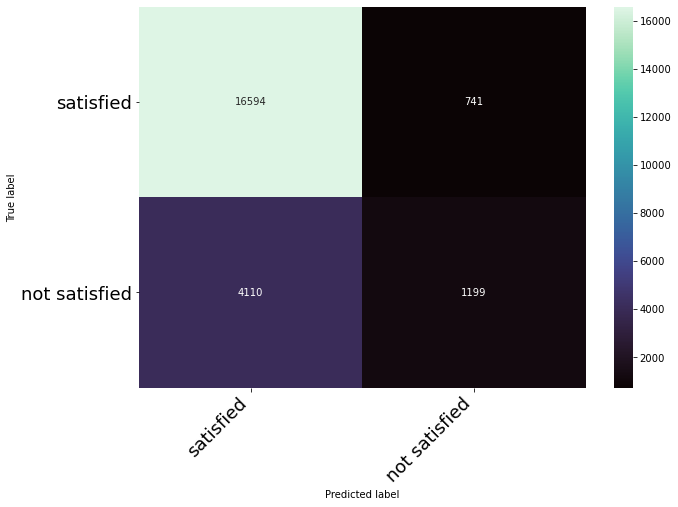

In [37]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train), 2)

print("Train Accuracy score :",acc_log)
print("Test Accuracy score :",  round(logreg.score(X_test, y_test), 2))


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['satisfied', 'not satisfied'])

In [38]:
log_val = model_selection.cross_val_score(logreg, X_train, y_train, cv=10).mean()

In [39]:
# get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

perform_list.append(dict([
    ('Model', 'Logistic Regression'),
    ('Train Accuracy', round(acc_log*100, 2)),
    ('Test Accuracy', round((logreg.score(X_test, y_test))*100, 2)),
    ("CV Accuracy",log_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('Logistic Regression')

Precision : 0.7097644361764847
Recall    : 0.5915485092253452
F-score   : 0.6016386185554072


## DecisionTree

Train Accuracy score : 0.83
Test Accuracy score : 0.77


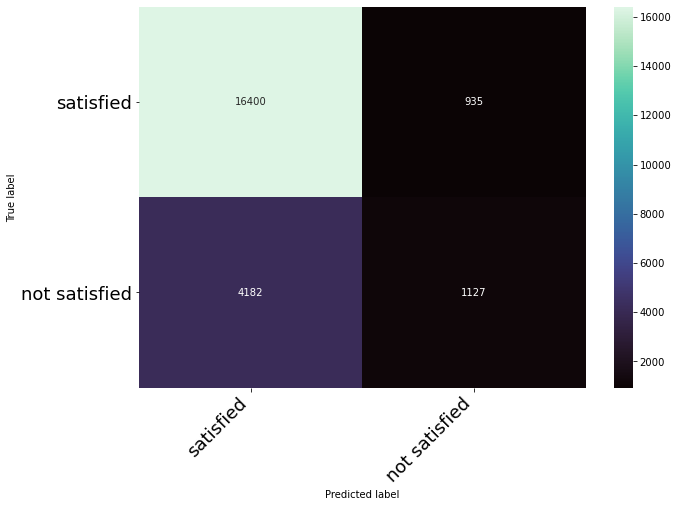

In [40]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 
y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, y_train) , 2)

print("Train Accuracy score :",acc_decision_tree)
print("Test Accuracy score :",  round(decision_tree.score(X_test, y_test), 2))


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['satisfied', 'not satisfied']) # 1 85

In [41]:
dt_val = model_selection.cross_val_score(decision_tree, X_train, y_train, cv=10).mean()

In [42]:
# get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

perform_list.append(dict([
    ('Model', 'Decision Tree'),
    ('Train Accuracy', round(acc_decision_tree*100, 2)),
    ('Test Accuracy', round((decision_tree.score(X_test, y_test))*100, 2)),
    ("CV Accuracy",dt_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('Decision Tree')

Precision : 0.671684745016056
Recall    : 0.579171955389412
F-score   : 0.585420156351401


## RandomForest

Train Accuracy score : 0.8282159142349266
Test Accuracy score : 0.7784843667196608


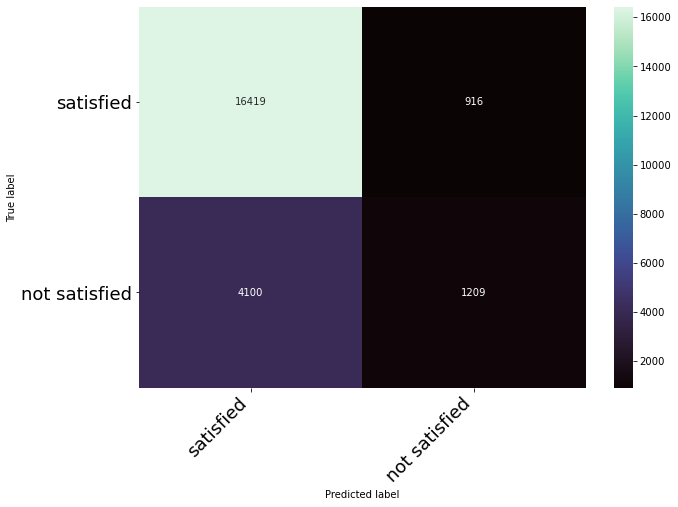

In [43]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = random_forest.score(X_train, y_train)

print("Train Accuracy score :",acc_random_forest)
print("Test Accuracy score :",  random_forest.score(X_test, y_test))


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)   
                                                          
cm = print_confusion_matrix(conf_mat, ['satisfied', 'not satisfied']) 

In [44]:
results = model_selection.cross_val_score(random_forest, X_train, y_train, cv=10).mean()
print(results.mean())

0.7797356968828684


In [45]:
# get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

perform_list.append(dict([
    ('Model', 'Random Forest'),
    ('Train Accuracy', round(acc_random_forest*100, 2)),
    ('Test Accuracy', round((random_forest.score(X_test, y_test))*100, 2)),
    ("CV Accuracy",results*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('Random Forest')

Precision : 0.6845631853404162
Recall    : 0.5874427145961902
F-score   : 0.5963765971744889


## KNN

Train Accuracy Score of Basic KNN model: % 0.78
Test Accuracy Score of Basic KNN model: % 0.75


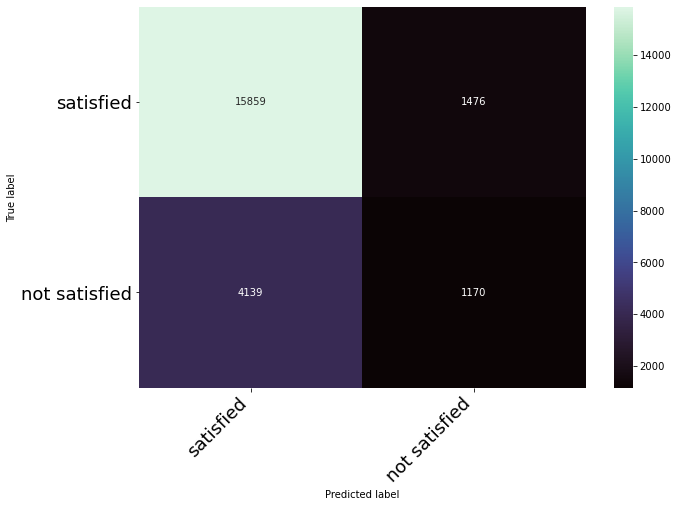

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_acc = round(knn.score(X_train, y_train), 2)
knn_acc_test = round(accuracy_score(y_test, y_pred),2)
print(f'Train Accuracy Score of Basic KNN model: % {knn_acc}')
print(f'Test Accuracy Score of Basic KNN model: % {knn_acc_test}')


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['satisfied', 'not satisfied'])

In [47]:
knn_val = model_selection.cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy').mean()

In [48]:
# get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

perform_list.append(dict([
    ('Model', 'KNN'),
    ('Train Accuracy', round(knn_acc*100, 2)),
    ('Test Accuracy', round(knn_acc_test*100, 2)),
    ("CV Accuracy",knn_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('KNN')

Precision : 0.6176030868392962
Recall    : 0.5676174134479911
F-score   : 0.5718757455683263


## Bagging

Train Accuracy Score of Bagged Decision Trees: % 82.82
Test Accuracy Score of Bagged Decision Trees: % 77.77
Precision : 0.682191870695543
Recall    : 0.5870830497574663
F1-score   : 0.5959253100076951


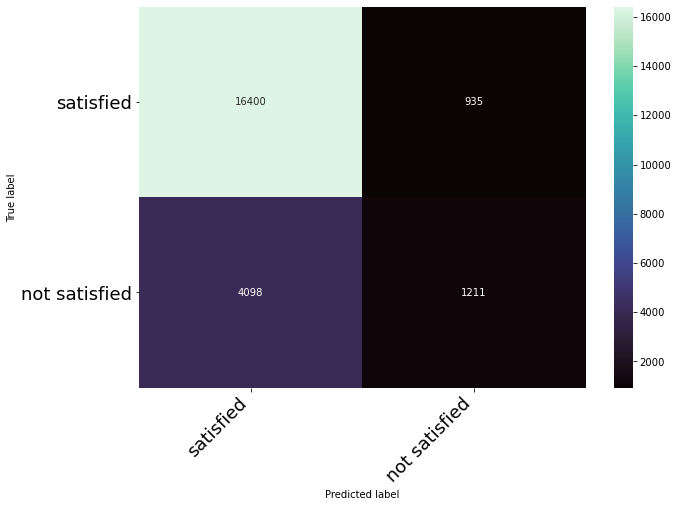

In [49]:
num_estimator = 100
seed = 7
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=num_estimator,
    bootstrap=True, n_jobs=-1, random_state=seed)

bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

bag_acc = round(bag.score(X_train, y_train) * 100, 2)
bag_acc_test = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of Bagged Decision Trees: % {bag_acc}')
print(f'Test Accuracy Score of Bagged Decision Trees: % {bag_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['satisfied', 'not satisfied'])

In [50]:
bag_val = model_selection.cross_val_score(bag, X_train, y_train, cv=3).mean()

In [51]:
perform_list.append(dict([
    ('Model', 'Bagging Classifier'),
    ('Train Accuracy', round(bag_acc, 2)),
    ('Test Accuracy', round(bag_acc_test, 2)),
    ("CV Accuracy",bag_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('Bagging Classifier')

## ExtraTree

Train Accuracy Score of Extra Trees: % 82.82
Test Accuracy Score of Extra Trees: % 77.9
Precision : 0.6878553933588005
Recall    : 0.5830192842093276
F1-score   : 0.5903084220329833


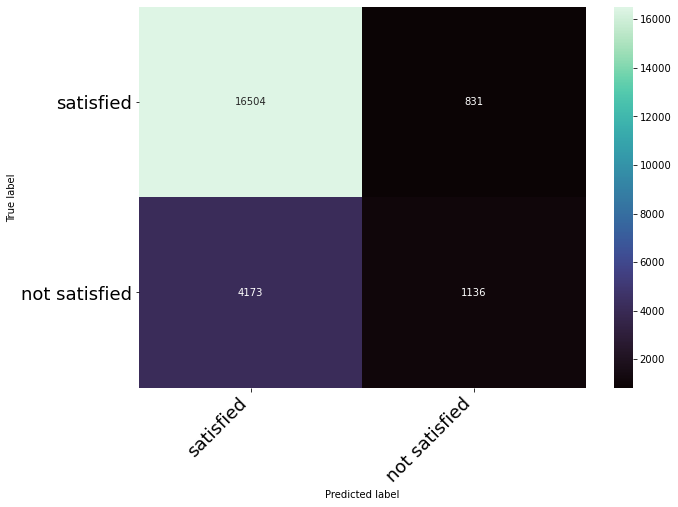

In [52]:
etc = ExtraTreesClassifier(n_estimators=num_estimator)
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)

etc_acc = round(etc.score(X_train, y_train) * 100, 2)
etc_acc_test = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of Extra Trees: % {etc_acc}')
print(f'Test Accuracy Score of Extra Trees: % {etc_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['satisfied', 'not satisfied'])

In [53]:
etc_val = model_selection.cross_val_score(etc, X_train, y_train, cv=5).mean()

In [54]:
perform_list.append(dict([
    ('Model', 'Extra Tree'),
    ('Train Accuracy', round(etc_acc, 2)),
    ('Test Accuracy', round(etc_acc_test, 2)),
    ("CV Accuracy",etc_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('Extra Tree Classifier')

## AdaBoost

Train Accuracy Score of AdaBoostClassifier: % 82.82
Test Accuracy Score of AdaBoostClassifier: % 77.51
Precision : 0.6748133950951791
Recall    : 0.5819838019617519
F1-score   : 0.5891944583216562


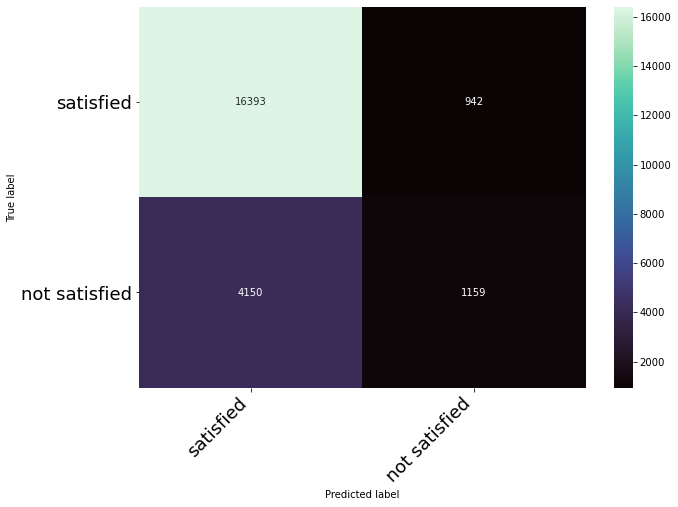

In [55]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=num_estimator, random_state = seed)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)

abc_acc = round(abc.score(X_train, y_train) *100 , 2)
abc_acc_test = round(accuracy_score(y_test, y_pred) * 100 ,2)

print(f'Train Accuracy Score of AdaBoostClassifier: % {abc_acc}')
print(f'Test Accuracy Score of AdaBoostClassifier: % {abc_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['satisfied', 'not satisfied'])

In [56]:
abc_val = model_selection.cross_val_score(abc, X_train, y_train, cv=5).mean()

In [57]:
perform_list.append(dict([
    ('Model', 'AdaBoost'),
    ('Train Accuracy', round(abc_acc, 2)),
    ('Test Accuracy', round(abc_acc_test, 2)),
    ("CV Accuracy",abc_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('AdaBoost')

## Gradient Boosting

Train Accuracy Score of GradientBoostingClassifier: % 78.38
Test Accuracy Score of GradientBoostingClassifier: % 78.24
Precision : 0.7513418688436374
Recall    : 0.5520205334009768
F1-score   : 0.5385409366444845


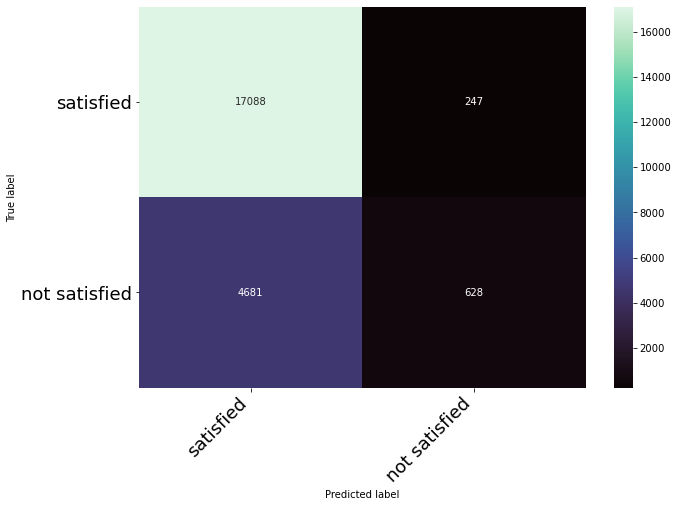

In [58]:
gbc = GradientBoostingClassifier(n_estimators=num_estimator, learning_rate=0.01, random_state=seed)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

gbc_acc = round(gbc.score(X_train, y_train) * 100, 2)
gbc_acc_test = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of GradientBoostingClassifier: % {gbc_acc}')
print(f'Test Accuracy Score of GradientBoostingClassifier: % {gbc_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['satisfied', 'not satisfied'])

In [59]:
gbc_val = model_selection.cross_val_score(gbc, X_train, y_train, cv=5).mean()

In [60]:
perform_list.append(dict([
    ('Model', 'Gradient Boosting'),
    ('Train Accuracy', round(gbc_acc, 2)),
    ('Test Accuracy', round(gbc_acc_test, 2)),
    ("CV Accuracy",gbc_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('Gradient Boosting')

## Gaussian Naive Bayes

Train Accuracy Score of GaussianNB: % 76.89
Test Accuracy Score of GaussianNB: % 76.55
Precision : 0.6327959363957597
Recall    : 0.5001306726288273
F1-score   : 0.43397243265748037


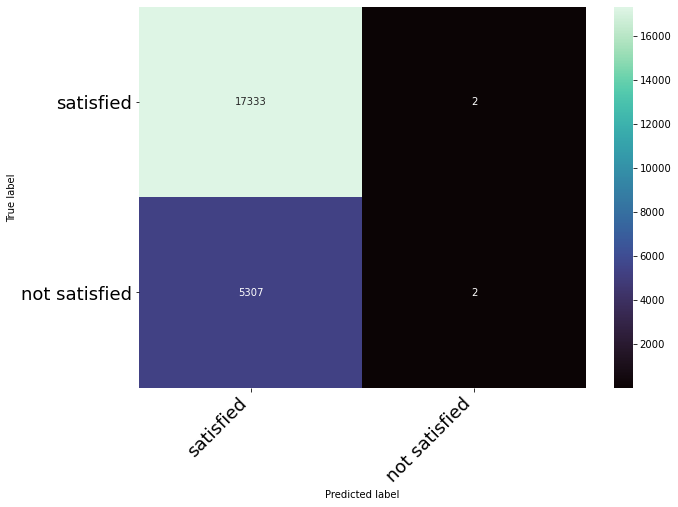

In [61]:
nb_g=GaussianNB()
nb_g.fit(X_train, y_train)
y_pred = nb_g.predict(X_test)

nbg_acc=round(nb_g.score(X_train, y_train) * 100, 2)
nbg_acc_test=round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of GaussianNB: % {nbg_acc}')
print(f'Test Accuracy Score of GaussianNB: % {nbg_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['satisfied', 'not satisfied'])

In [62]:
nb_g_val = model_selection.cross_val_score(nb_g, X_train, y_train, cv=kf).mean()

In [63]:
perform_list.append(dict([
    ('Model', 'GaussianNB'),
    ('Train Accuracy', round(nbg_acc, 2)),
    ('Test Accuracy', round(nbg_acc_test, 2)),
    ("CV Accuracy",nb_g_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('GaussianNB')

 ## Bernoulli

Train Accuracy Score of BernoulliNB: % 78.62
Test Accuracy Score of BernoulliNB: % 78.59
Precision : 0.7101883475343602
Recall    : 0.59199056431919
F1-score   : 0.6022335349785016


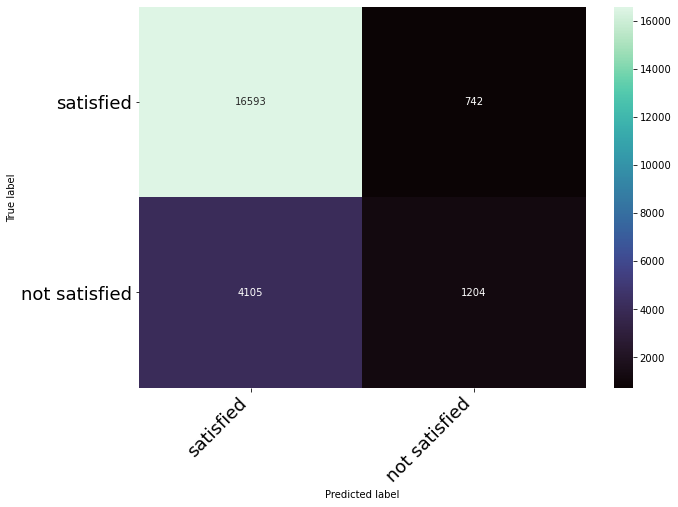

In [64]:
nb_b=BernoulliNB()
nb_b.fit(X_train, y_train)
y_pred = nb_b.predict(X_test)

nbb_acc=round(nb_b.score(X_train, y_train) * 100, 2)
nbb_acc_test=round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of BernoulliNB: % {nbb_acc}')
print(f'Test Accuracy Score of BernoulliNB: % {nbb_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['satisfied', 'not satisfied'])

In [65]:
nb_b_val = model_selection.cross_val_score(nb_b, X_train, y_train, cv=kf,).mean()

In [66]:
perform_list.append(dict([
    ('Model', 'BernoulliNB'),
    ('Train Accuracy', round(nbg_acc, 2)),
    ('Test Accuracy', round(nbg_acc_test, 2)),
    ("CV Accuracy",nb_g_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('BernoulliNB')

## XGB Classifier

[14:14:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy Score of BernoulliNB: % 79.49
Test Accuracy Score of BernoulliNB: % 78.49
Precision : 0.7174409796752325
Recall    : 0.5785865852583215
F1-score   : 0.5830751851045296


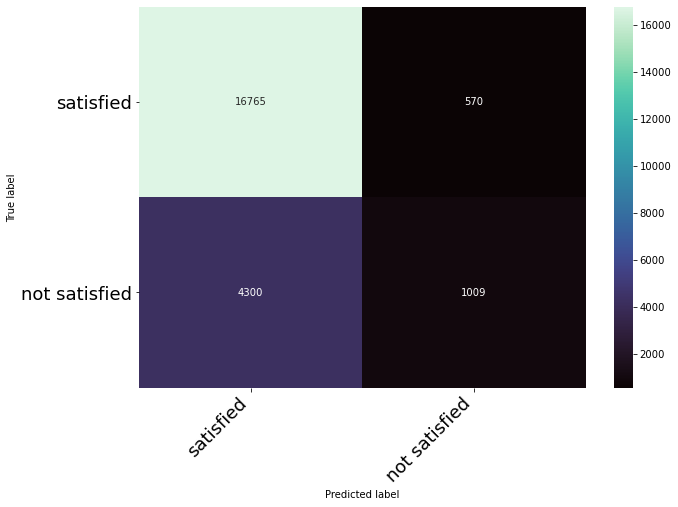

In [67]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

clf_acc=round(clf.score(X_train, y_train) * 100, 2)
clf_acc_test=round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of BernoulliNB: % {clf_acc}')
print(f'Test Accuracy Score of BernoulliNB: % {clf_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['satisfied', 'not satisfied'])

In [68]:
perform_list.append(dict([
    ('Model', 'XGBClassifier'),
    ('Train Accuracy', round(nbg_acc, 2)),
    ('Test Accuracy', round(nbg_acc_test, 2)),
    ("CV Accuracy",nb_g_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('XGBClassifier')

In [69]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Train Accuracy', 'Test Accuracy','CV Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Train Accuracy,Test Accuracy,CV Accuracy,Precision,Recall,F1
0,Logistic Regression,79.00,78.58,78.598477,70.98,59.15,60.16
1,Decision Tree,83.00,77.40,77.613640,67.17,57.92,58.54
2,Random Forest,82.82,77.85,77.973570,68.46,58.74,59.64
3,KNN,78.00,75.00,75.746736,61.76,56.76,57.19
4,Bagging Classifier,82.82,77.77,77.584931,68.22,58.71,57.19
5,Extra Tree,82.82,77.90,77.965842,68.79,58.30,57.19
6,AdaBoost,82.82,77.51,77.355285,67.48,58.20,57.19
7,Gradient Boosting,78.38,78.24,78.424034,75.13,55.20,57.19
8,GaussianNB,76.89,76.55,76.885902,63.28,50.01,57.19
9,BernoulliNB,76.89,76.55,76.885902,71.02,59.20,57.19


In [70]:
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE(random_state=42).fit_resample(X,y)

In [71]:
Counter(y_smoted)

Counter({1: 86970, 0: 86970})

In [72]:
classifier = RandomForestClassifier().fit(X_smoted, y_smoted)
clf = RandomForestClassifier()
clf.fit(X_smoted, y_smoted)
y_pred = clf.predict(X_test)

clf_acc=round(clf.score(X_smoted, y_smoted) * 100, 2)
clf_acc_test=round(accuracy_score(y_test, y_pred) * 100, 2)


print(f'Train Accuracy Score of RandomForest: % {clf_acc}')
print(f'Test Accuracy Score of RandomForest: % {clf_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')


Train Accuracy Score of RandomForest: % 71.46
Test Accuracy Score of RandomForest: % 73.28
Precision : 0.6580727663217476
Recall    : 0.6920154579656762
F1-score   : 0.6670864992462873


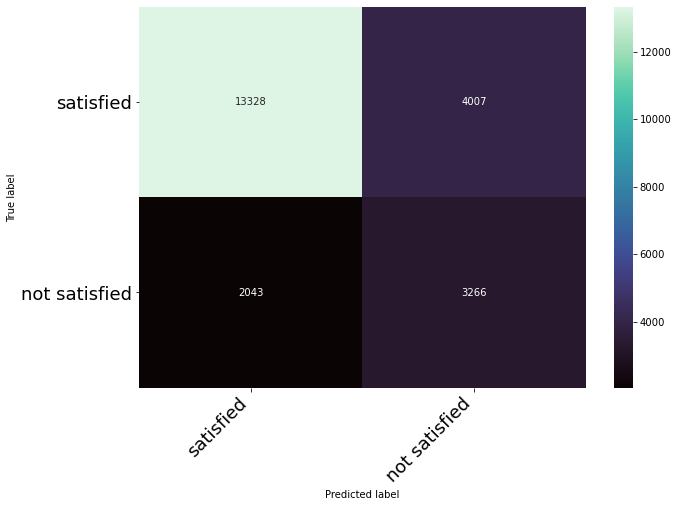

In [73]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['satisfied', 'not satisfied'])

In [74]:
# Number of trees in the ensamble
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 2000, num = 10)]
# MAX FEATURES to be utilized in every split
max_features = ['auto', 'sqrt']
# DEPTH of Tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 1)]
max_depth.append(None)
# Minimum nymber of samples to use to form a node
min_samples_split = [2, 3, 4, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



ex = RandomForestClassifier()

ex_random = RandomizedSearchCV(estimator = ex, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
ex_random.fit(X_smoted, y_smoted)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 10],
                                        'n_estimators': [80, 293, 506, 720, 933,
                                                         1146, 1360, 1573, 1786,
                                                         2000]},
                   random_state=42, verbose=2)

In [75]:
ex_random.best_params_

{'n_estimators': 1146,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

Train Accuracy score : 0.71
Test Accuracy score : 0.74


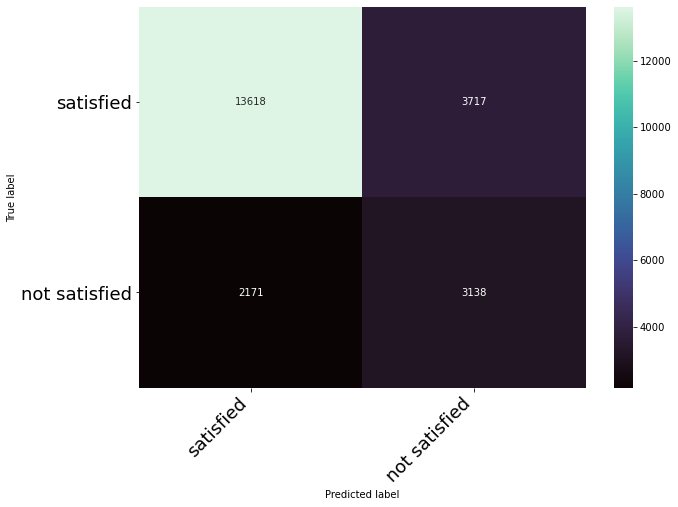

In [78]:
random_forest = RandomForestClassifier(bootstrap=False,
 max_depth= None,
 max_features='auto',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 1146)
random_forest.fit(X_smoted, y_smoted)

y_pred = random_forest.predict(X_test)

random_forest.score(X_smoted, y_smoted)
acc_random_forest = round(random_forest.score(X_smoted, y_smoted), 2)

print("Train Accuracy score :",acc_random_forest)
print("Test Accuracy score :",  round(random_forest.score(X_test, y_test), 2))


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)   
                                                          
cm = print_confusion_matrix(conf_mat, ['satisfied', 'not satisfied'])

In [90]:
col_imp = random_forest.feature_importances_

importances = pd.DataFrame({'feature':(dataFrame.drop(columns=["review_score"])).columns,'importance':np.round(col_imp,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(18)

,importance
feature,
product_photos_qty,0.237
seller_count,0.173
delivery,0.170
different_between_approved_purchase,0.159
price,0.109
delivered_hour_evening,0.018
delivered_hour_midday,0.018
payment_type_credit_card,0.017
delivered_season_winter,0.017


In [79]:
acc_random_forest = random_forest.score(X_smoted, y_smoted)

print("Train Accuracy score :",acc_random_forest)
print("Test Accuracy score :",  random_forest.score(X_test, y_test))
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Train Accuracy score : 0.7146487294469357
Test Accuracy score : 0.7399752693870341
Precision : 0.660133630412997
Recall    : 0.6883250373526938
F1-score   : 0.6690961957303638


In [80]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_smoted, clf.predict_proba(X_smoted)[:,1])

ROC AUC score =  0.8118017303356844


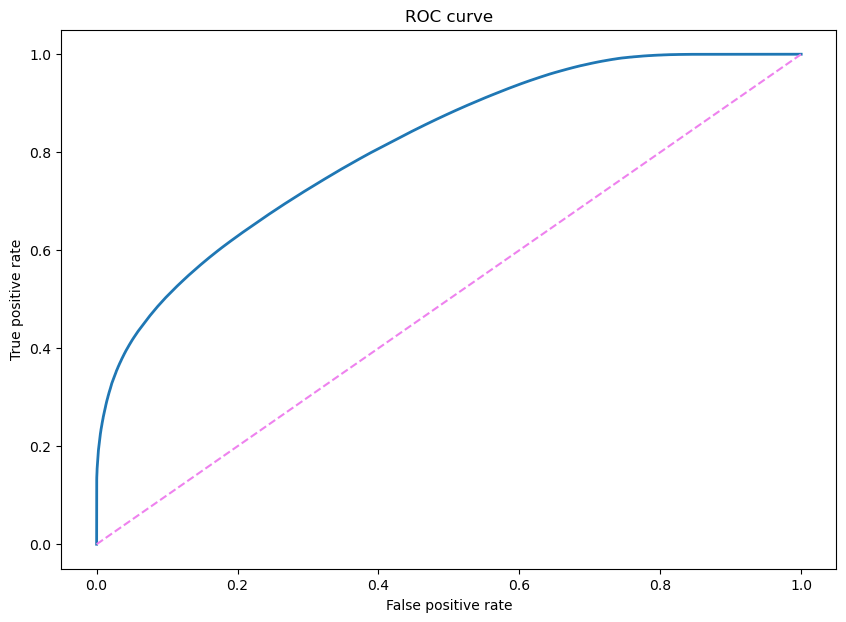

In [87]:
plt.figure(figsize=(10,7),dpi=100),
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.style.use('default')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_smoted, clf.predict_proba(X_smoted)[:,1]))

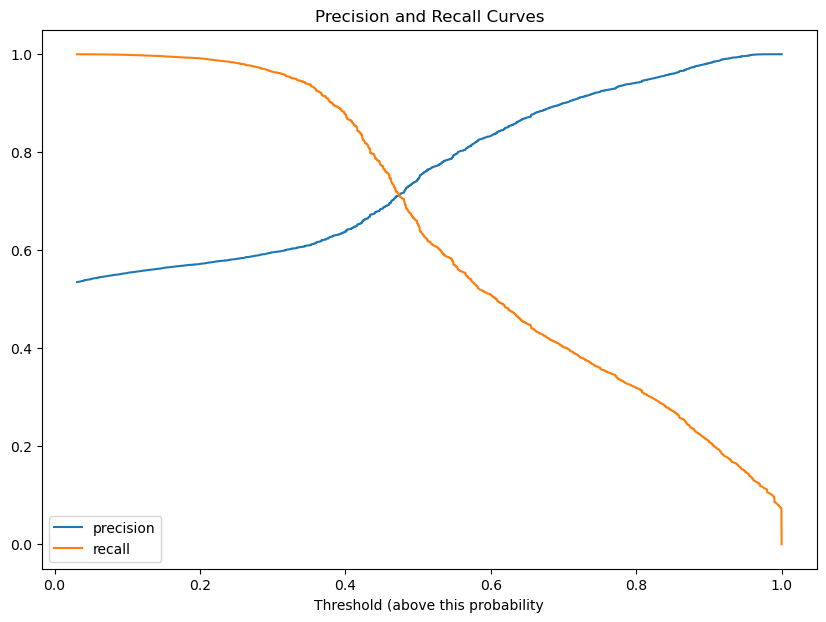

In [89]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score


precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_smoted, clf.predict_proba(X_smoted)[:,1] )

plt.figure(figsize=(10,7),dpi=100),
plt.style.use('default')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability');
plt.title('Precision and Recall Curves');